# NICK'S ANALYSIS

## Main Question
* Do students have higher earnings if their degree program was one of the top five degree programs  
Sub Questions: 
  * What are the distribution of degrees awarded by state and across the U.S. 
  * Are there any trends in the percentage of degrees awared over the year 1997 - 2020

## Assumptions
* Removed certifications columns starting with CIP because they indicate the type of degree awarded by that institution. We have already filtered based on predominately Bachelor degree granting institutions and to filter further would deviate from analysis done by the rest of the team. 


## Install and Import Packages

In [1]:
!pip install pandas numpy seaborn sklearn matplotlib shap &> /dev/null
!echo "Installed Python packages"

Installed Python packages


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import files

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

## Import Files:

In [3]:
drive.mount('/content/gdrive') # Mount the drive

df = pd.read_csv("gdrive/MyDrive/W200_Project_2/w200_project2_cleaned_v1.csv") # from my drive, change path to gdrive/Shareddrives... if not located in MyDrive
ref_df = pd.read_csv("gdrive/MyDrive/W200_Project_2/Reference_table.csv") # add the reference table for lookup
df_desc = pd.read_csv("gdrive/MyDrive/W200_Project_2/w200_dataset_description.csv") #  Add the description table

# Unused column. Numeric and was used a primary key from College Scorecard
df = df.drop(columns = ['Unnamed: 0']) 
ref_df = ref_df.drop(columns = ['Unnamed: 0'])
df_desc = df_desc.drop(columns = ['Unnamed: 0'])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,48,50,82,83,108,156,160,174) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
ref_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name_of_data_element     262 non-null    object 
 1   dev_category             262 non-null    object 
 2   developer_friendly_name  262 non-null    object 
 3   api_data_type            262 non-null    object 
 4   index                    261 non-null    object 
 5   variable_name            262 non-null    object 
 6   value                    107 non-null    float64
 7   label                    145 non-null    object 
 8   source                   168 non-null    object 
 9   shown_use_on_site        42 non-null     object 
 10  notes                    68 non-null     object 
dtypes: float64(1), object(10)
memory usage: 22.6+ KB


In [5]:
df_desc.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Variable       175 non-null    object 
 1   count          175 non-null    float64
 2   unique         72 non-null     float64
 3   top            72 non-null     object 
 4   freq           72 non-null     float64
 5   mean           103 non-null    float64
 6   std            103 non-null    float64
 7   min            103 non-null    float64
 8   25%            103 non-null    float64
 9   50%            103 non-null    float64
 10  75%            103 non-null    float64
 11  max            103 non-null    float64
 12  percent_empty  175 non-null    float64
dtypes: float64(11), object(2)
memory usage: 17.9+ KB


In [6]:
# Information about the dataframe used for analysis
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48477 entries, 0 to 48476
Data columns (total 175 columns):
 #    Column                                         Non-Null Count  Dtype  
---   ------                                         --------------  -----  
 0    ADM_RATE                                       31141 non-null  float64
 1    ADM_RATE_ALL                                   31914 non-null  float64
 2    Carnegie Classification Basic                  2041 non-null   object 
 3    Carnegie Classification size and setting       2041 non-null   object 
 4    Carnegie Classification undergraduate profile  2041 non-null   object 
 5    CIP01BACHL                                     48474 non-null  object 
 6    CIP03BACHL                                     48474 non-null  object 
 7    CIP04BACHL                                     48474 non-null  object 
 8    CIP05BACHL                                     48474 non-null  object 
 9    CIP09BACHL                           

## Function(s)

In [7]:
def reference_lookup(variable):
  """ Find information about the variable from the data dictionary """
  if type(variable) == str: 
    return ref_df[ref_df['variable_name'] == (variable)]
  elif type(variable) == list:
    return ref_df[ref_df['variable_name'].isin(variable)]
  else: 
    return "Please enter a variable name or list"

In [8]:
def save_image(img_name, dpi_num): 
  """ To help save time saving images to add to paper and presentation.
  Takes the image name to save as a png file and the dots per square inch."""
  plt.savefig(img_name+'.png', dpi = dpi_num, orientation = 'landscape', bbox_inches = 'tight')

## Analysis

In [9]:
# Preview of dataframe
df.head()

ADM_RATE  ADM_RATE_ALL Carnegie Classification Basic  \
0       NaN           NaN                           NaN   
1       NaN           NaN                           NaN   
2       NaN           NaN                           NaN   
3       NaN           NaN                           NaN   
4       NaN           NaN                           NaN   

  Carnegie Classification size and setting  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Carnegie Classification undergraduate profile           CIP01BACHL  \
0                                           NaN      Program offered   
1                                           NaN  Program not offered   
2                                           NaN  Program not offered   
3                                           NaN  Program not offered   
4                                           NaN  Program not offered   

            CIP03BACHL           CIP04BACHL           CIP05BACHL  \
0      Program offered      Program offered  Program not offered   
1  Program not offered  Program not offered  Program not offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered  Program not offered      Program offered   
4  Program not offered  Program not offered  Program not offered   

            CIP09BACHL           CIP10BACHL           CIP11BACHL  \
0  Program not offered      Program offered      Program offered   
1      Program offered  Program not offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered  Program not offered      Program offered   
4      Program offered  Program not offered      Program offered   

            CIP12BACHL           CIP13BACHL           CIP14BACHL  \
0  Program not offered      Program offered      Program offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered      Program offered   
4  Program not offered      Program offered  Program not offered   

            CIP15BACHL           CIP16BACHL           CIP19BACHL  \
0      Program offered  Program not offered      Program offered   
1  Program not offered      Program offered  Program not offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered  Program not offered   
4  Program not offered  Program not offered  Program not offered   

            CIP22BACHL           CIP23BACHL           CIP24BACHL  \
0  Program not offered      Program offered  Program not offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered  Program not offered   
4  Program not offered      Program offered  Program not offered   

            CIP25BACHL           CIP26BACHL           CIP27BACHL  \
0  Program not offered      Program offered      Program offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered      Program offered   
4  Program not offered      Program offered      Program offered   

            CIP29BACHL           CIP30BACHL           CIP31BACHL  \
0  Program not offered  Program not offered  Program not offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered  Program not offered   
4  Program not offered  Program not offered      Program offered   

            CIP38BACHL           CIP39BACHL           CIP40BACHL  \
0  Prog

In [10]:
df_desc = df_desc.rename(columns = {'Unnamed: 0': "Variable", 'perct_empty': 'percent_empty'})
df_desc.head()

Variable     count  unique  \
0      ADM_RATE 31,141.00     NaN   
1  ADM_RATE_ALL 31,914.00     NaN   
2       CCBASIC  2,041.00   20.00   
3      CCSIZSET  2,041.00   14.00   
4      CCUGPROF  2,041.00   13.00   

                                                 top   freq  mean  std  min  \
0                                                NaN    NaN  0.67 0.20 0.00   
1                                                NaN    NaN  0.67 0.20 0.00   
2  Master's Colleges & Universities: Larger Programs 341.00   NaN  NaN  NaN   
3               Four-year, small, highly residential 372.00   NaN  NaN  NaN   
4  Four-year, full-time, inclusive, higher transf... 370.00   NaN  NaN  NaN   

   25%  50%  75%  max  percent_empty  
0 0.55 0.70 0.81 1.00          35.76  
1 0.55 0.69 0.81 1.00          34.17  
2  NaN  NaN  NaN  NaN          95.79  
3  NaN  NaN  NaN  NaN          95.79  
4  NaN  NaN  NaN  NaN          95.79

In [11]:
df_desc.sort_values(by = ['percent_empty', 'Variable'], ascending = False).head()

Variable    count  unique             top   freq      mean  \
155                RELAFFIL   733.00   57.00  Roman Catholic 199.00       NaN   
69   MD_EARN_WNE_INDEP1_P10 1,600.00     NaN             NaN    NaN 49,128.37   
71    MD_EARN_WNE_INDEP1_P8 1,629.00     NaN             NaN    NaN 45,993.88   
70    MD_EARN_WNE_INDEP1_P6 1,665.00     NaN             NaN    NaN 43,188.10   
63     MD_EARN_WNE_INC3_P10 1,696.00     NaN             NaN    NaN 57,055.47   

          std       min       25%       50%       75%        max  \
155       NaN       NaN       NaN       NaN       NaN        NaN   
69  14,359.89 17,297.00 39,760.00 46,970.00 55,533.50 125,815.00   
71  13,608.67 17,187.00 37,136.00 44,269.00 52,578.00 124,841.00   
70  13,283.70 14,213.00 34,445.00 41,456.00 49,494.00 124,183.00   
63  14,061.22 25,082.00 48,042.00 54,236.00 64,245.25 125,001.00   

     percent_empty  
155          98.49  
69           96.70  
71           96.64  
70           96.57  
63           96.50

In [12]:
ref_df.head()

name_of_data_element dev_category  \
0                         Unit ID for institution         root   
1                                Institution name       school   
2                                            City       school   
3                                        ZIP code       school   
4  Predominant degree awarded (recoded 0s and 4s)       school   

               developer_friendly_name api_data_type         index  \
0                                   id       integer           NaN   
1                                 name  autocomplete      fulltext   
2                                 city  autocomplete  varchar(200)   
3                                  zip        string   varchar(20)   
4  degrees_awarded.predominant_recoded       integer  varchar(200)   

  variable_name  value label       source shown_use_on_site  \
0        UNITID    NaN   NaN        IPEDS               Yes   
1        INSTNM    NaN   NaN        IPEDS               Yes   
2          CITY    NaN   NaN        IPEDS               Yes   
3           ZIP    NaN   NaN        IPEDS               NaN   
4       SCH_DEG    NaN   NaN  IPEDS/NSLDS               NaN   

                                               notes  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Missing values, 0s, and 4s from PREDDEG recode...

In [13]:
df_desc.head()

Variable     count  unique  \
0      ADM_RATE 31,141.00     NaN   
1  ADM_RATE_ALL 31,914.00     NaN   
2       CCBASIC  2,041.00   20.00   
3      CCSIZSET  2,041.00   14.00   
4      CCUGPROF  2,041.00   13.00   

                                                 top   freq  mean  std  min  \
0                                                NaN    NaN  0.67 0.20 0.00   
1                                                NaN    NaN  0.67 0.20 0.00   
2  Master's Colleges & Universities: Larger Programs 341.00   NaN  NaN  NaN   
3               Four-year, small, highly residential 372.00   NaN  NaN  NaN   
4  Four-year, full-time, inclusive, higher transf... 370.00   NaN  NaN  NaN   

   25%  50%  75%  max  percent_empty  
0 0.55 0.70 0.81 1.00          35.76  
1 0.55 0.69 0.81 1.00          34.17  
2  NaN  NaN  NaN  NaN          95.79  
3  NaN  NaN  NaN  NaN          95.79  
4  NaN  NaN  NaN  NaN          95.79

In [14]:
df['ENDYEAR'].dtype

dtype('int64')

In [15]:
print(df.filter(regex = 'MD_EARN_WNE_P.|ENDYEAR').info(verbose = True, show_counts = True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48477 entries, 0 to 48476
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENDYEAR          48477 non-null  int64  
 1   MD_EARN_WNE_P10  13309 non-null  float64
 2   MD_EARN_WNE_P6   17095 non-null  float64
 3   MD_EARN_WNE_P8   15193 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.5 MB
None


In [16]:
earnings = df.filter(regex = 'MD_EARN_WNE_P.|ENDYEAR').groupby('ENDYEAR')['MD_EARN_WNE_P10','MD_EARN_WNE_P6', 'MD_EARN_WNE_P8'].mean().stack().reset_index().rename(columns = {'level_1': 'Variable', 0:'Mean'})
earnings.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ENDYEAR         Variable      Mean
0     2004   MD_EARN_WNE_P6 36,972.87
1     2006   MD_EARN_WNE_P6 36,726.27
2     2006   MD_EARN_WNE_P8 41,063.39
3     2008  MD_EARN_WNE_P10 44,654.36
4     2008   MD_EARN_WNE_P6 36,830.99

In [17]:
# Create list of columns to perform aggregation mean on 
md_earn_cols = df.filter(regex = 'MD_EARN_WNE_P.').columns.tolist()

In [18]:
earnings_by_year_state = df.filter(regex = 'STATE|ENDYEAR|MD_EARN_WNE_P.').groupby(['ENDYEAR', 'STATE']).mean().stack().reset_index().rename(columns = {'level_2': 'VARIABLE', 0: 'MEAN'})

In [19]:
earnings_by_year_state.head()

ENDYEAR       STATE        VARIABLE      MEAN
0     2004     Alabama  MD_EARN_WNE_P6 30,857.14
1     2004      Alaska  MD_EARN_WNE_P6 30,340.00
2     2004     Arizona  MD_EARN_WNE_P6 45,268.42
3     2004    Arkansas  MD_EARN_WNE_P6 32,075.00
4     2004  California  MD_EARN_WNE_P6 42,990.40

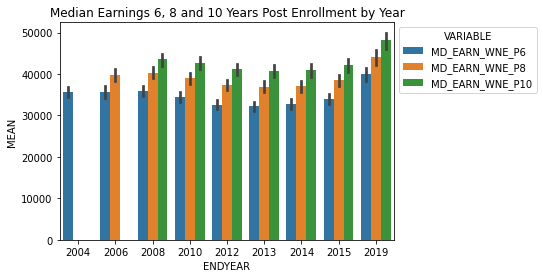

In [20]:
# Plot median earing columns by year
g = sns.barplot(data = earnings_by_year_state, x = 'ENDYEAR' , y = 'MEAN', hue = 'VARIABLE')
sns.move_legend(g, 'upper left', bbox_to_anchor=(1,1))
plt.title("Median Earnings 6, 8 and 10 Years Post Enrollment by Year", fontsize = 12)
save_image('Median_earnings_by_year', 300)

In [21]:
reference_lookup(earnings.Variable.tolist())

name_of_data_element dev_category  \
225  Median earnings of students working and not en...     earnings   
228  Median earnings of students working and not en...     earnings   
231  Median earnings of students working and not en...     earnings   

               developer_friendly_name api_data_type    index  \
225          10_yrs_after_entry.median       integer  integer   
228           6_yrs_after_entry.median       integer  integer   
231  8_yrs_after_entry.median_earnings         float    float   

       variable_name  value label    source shown_use_on_site notes  
225  MD_EARN_WNE_P10    NaN   NaN  Treasury               Yes   NaN  
228   MD_EARN_WNE_P6    NaN   NaN  Treasury               NaN   NaN  
231   MD_EARN_WNE_P8    NaN   NaN  Treasury               NaN   NaN

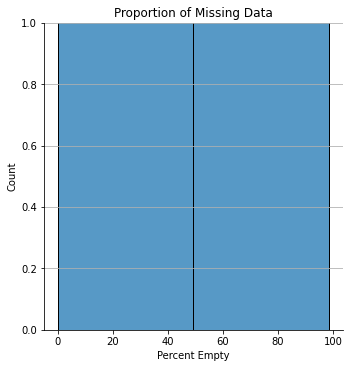

In [22]:
# Distribution plot for missing data in the data frame. 
sns.displot(df_desc['percent_empty'], stat = 'count', bins = 2)
plt.title("Proportion of Missing Data")
plt.xlabel("Percent Empty")
plt.ylim(0,1.0)
plt.grid(True, which = 'major', axis = 'y')
plt.savefig('empty_data_proportion.png', dpi = 600, orientation = 'landscape', bbox_inches = 'tight')

Approximately 60% of the data is empty for

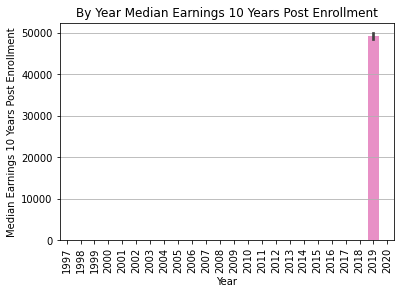

In [23]:
sns.barplot(x = df['ENDYEAR'], y = df['MD_EARN_WNE_INDEP1_P10'])
plt.title("By Year Median Earnings 10 Years Post Enrollment")
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Median Earnings 10 Years Post Enrollment")
# plt.ylim(0,1.0)
plt.grid(True, which = 'major', axis = 'y')
plt.savefig('earings.png', dpi = 600, orientation = 'landscape', bbox_inches = 'tight')

In [24]:
carnegie_cols = ['Carnegie Classification undergraduate profile', 'Carnegie Classification Basic', 'Carnegie Classification size and setting']

In [25]:
# Column lists
carnegie_cols2 = df.filter(regex = "Carnegie.").columns.tolist()
sat_cols = df.filter(regex = "SAT.").columns.tolist()
act_cols = df.filter(regex = "ACT.").columns.tolist()

# print(carnegie_cols2)
# print(sat_cols)
# print(act_cols)

In [26]:
for col in carnegie_cols: 
  print("-" * 10 + col + "-"* 10)
  print(df[col].value_counts())
  print('\n')

----------Carnegie Classification undergraduate profile----------
Four-year, full-time, inclusive, higher transfer-in            370
Four-year, full-time, selective, higher transfer-in            323
Four-year, full-time, more selective, lower transfer-in        291
Four-year, higher part-time                                    219
Four-year, full-time, selective, lower transfer-in             203
Four-year, medium full-time, inclusive, higher transfer-in     163
Four-year, full-time, inclusive, lower transfer-in             145
Four-year, medium full-time , selective, higher transfer-in    129
Four-year, full-time, more selective, higher transfer-in       128
Not applicable                                                  42
Not classified (Exclusively Graduate)                           13
Four-year, medium full-time, inclusive, lower transfer-in       12
Four-year, medium full-time, selective, lower transfer-in        3
Name: Carnegie Classification undergraduate profile, dtype: int

In [27]:
df['HIGHDEG'].value_counts()

Graduate degree        35888
Bachelor's degree      12140
Non-degree-granting      449
Name: HIGHDEG, dtype: int64

In [28]:
ref_df.head()

name_of_data_element dev_category  \
0                         Unit ID for institution         root   
1                                Institution name       school   
2                                            City       school   
3                                        ZIP code       school   
4  Predominant degree awarded (recoded 0s and 4s)       school   

               developer_friendly_name api_data_type         index  \
0                                   id       integer           NaN   
1                                 name  autocomplete      fulltext   
2                                 city  autocomplete  varchar(200)   
3                                  zip        string   varchar(20)   
4  degrees_awarded.predominant_recoded       integer  varchar(200)   

  variable_name  value label       source shown_use_on_site  \
0        UNITID    NaN   NaN        IPEDS               Yes   
1        INSTNM    NaN   NaN        IPEDS               Yes   
2          CITY    NaN   NaN        IPEDS               Yes   
3           ZIP    NaN   NaN        IPEDS               NaN   
4       SCH_DEG    NaN   NaN  IPEDS/NSLDS               NaN   

                                               notes  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Missing values, 0s, and 4s from PREDDEG recode...

Smaller dataset: Taking out all schools who's highest degree offered is Associates or lower





In [29]:
df_deg = df[df['HIGHDEG'].isin(["Bachelor's degree", "Graduate degree"])]

Smaller dataset: Columns of interest related to question at top

In [30]:
# refine dataset to speed up graphing and confine results to variables of interest for question at top
remove_cols = df.filter(regex = 'NPT.|MD_EARN.').columns.tolist()
percent_df = df_deg.drop(remove_cols + ['NUMBRANCH'], axis = 1)
percent_df.head()

ADM_RATE  ADM_RATE_ALL Carnegie Classification Basic  \
0       NaN           NaN                           NaN   
1       NaN           NaN                           NaN   
2       NaN           NaN                           NaN   
3       NaN           NaN                           NaN   
4       NaN           NaN                           NaN   

  Carnegie Classification size and setting  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Carnegie Classification undergraduate profile           CIP01BACHL  \
0                                           NaN      Program offered   
1                                           NaN  Program not offered   
2                                           NaN  Program not offered   
3                                           NaN  Program not offered   
4                                           NaN  Program not offered   

            CIP03BACHL           CIP04BACHL           CIP05BACHL  \
0      Program offered      Program offered  Program not offered   
1  Program not offered  Program not offered  Program not offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered  Program not offered      Program offered   
4  Program not offered  Program not offered  Program not offered   

            CIP09BACHL           CIP10BACHL           CIP11BACHL  \
0  Program not offered      Program offered      Program offered   
1      Program offered  Program not offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered  Program not offered      Program offered   
4      Program offered  Program not offered      Program offered   

            CIP12BACHL           CIP13BACHL           CIP14BACHL  \
0  Program not offered      Program offered      Program offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered      Program offered   
4  Program not offered      Program offered  Program not offered   

            CIP15BACHL           CIP16BACHL           CIP19BACHL  \
0      Program offered  Program not offered      Program offered   
1  Program not offered      Program offered  Program not offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered  Program not offered   
4  Program not offered  Program not offered  Program not offered   

            CIP22BACHL           CIP23BACHL           CIP24BACHL  \
0  Program not offered      Program offered  Program not offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered  Program not offered   
4  Program not offered      Program offered  Program not offered   

            CIP25BACHL           CIP26BACHL           CIP27BACHL  \
0  Program not offered      Program offered      Program offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered      Program offered   
4  Program not offered      Program offered      Program offered   

            CIP29BACHL           CIP30BACHL           CIP31BACHL  \
0  Program not offered  Program not offered  Program not offered   
1  Program not offered      Program offered      Program offered   
2  Program not offered  Program not offered  Program not offered   
3  Program not offered      Program offered  Program not offered   
4  Program not offered  Program not offered      Program offered   

            CIP38BACHL           CIP39BACHL           CIP40BACHL  \
0  Prog

### Dictionary column look up

In [31]:
percent_degrees = df_deg.filter(regex = 'PCIP*').columns.tolist() # create list of percentage columns to look at

var_dict = ref_df[ref_df['variable_name'].isin(percent_degrees)][['variable_name','label']] # pull out labels
var_dict = dict(zip(var_dict.iloc[:, 0], var_dict.iloc[:, 1])) # create dictionary for later

var_dict # check

{'PCIP01': 'Agriculture, Agriculture Operations, and Related Sciences',
 'PCIP03': 'Natural Resources and Conservation',
 'PCIP04': 'Architecture and Related Services',
 'PCIP05': 'Area, Ethnic, Cultural, Gender, and Group Studies',
 'PCIP09': 'Communication, Journalism, and Related Programs',
 'PCIP10': 'Communications Technologies/Technicians and Support Services',
 'PCIP11': 'Computer and Information Sciences and Support Services',
 'PCIP12': 'Personal and Culinary Services',
 'PCIP13': 'Education',
 'PCIP14': 'Engineering',
 'PCIP15': 'Engineering Technologies and Engineering-Related Fields',
 'PCIP16': 'Foreign Languages, Literatures, and Linguistics',
 'PCIP19': 'Family and Consumer Sciences/Human Sciences',
 'PCIP22': 'Legal Professions and Studies',
 'PCIP23': 'English Language and Literature/Letters',
 'PCIP24': 'Liberal Arts and Sciences, General Studies and Humanities',
 'PCIP25': 'Library Science',
 'PCIP26': 'Biological and Biomedical Sciences',
 'PCIP27': 'Mathematics and

In [32]:
# Preview of reference dataframe
print(ref_df.head())

                             name_of_data_element dev_category  \
0                         Unit ID for institution         root   
1                                Institution name       school   
2                                            City       school   
3                                        ZIP code       school   
4  Predominant degree awarded (recoded 0s and 4s)       school   

               developer_friendly_name api_data_type         index  \
0                                   id       integer           NaN   
1                                 name  autocomplete      fulltext   
2                                 city  autocomplete  varchar(200)   
3                                  zip        string   varchar(20)   
4  degrees_awarded.predominant_recoded       integer  varchar(200)   

  variable_name  value label       source shown_use_on_site  \
0        UNITID    NaN   NaN        IPEDS               Yes   
1        INSTNM    NaN   NaN        IPEDS               

In [33]:
# Create list of variable degrees to be used in graphing
var_degrees = [var_dict.get(item,item) for item in percent_degrees] # change values to degree information, degree list
var_degrees.sort()
print(var_degrees)

['Agriculture, Agriculture Operations, and Related Sciences', 'Architecture and Related Services', 'Area, Ethnic, Cultural, Gender, and Group Studies', 'Biological and Biomedical Sciences', 'Business, Management, Marketing, and Related Support Services', 'Communication, Journalism, and Related Programs', 'Communications Technologies/Technicians and Support Services', 'Computer and Information Sciences and Support Services', 'Construction Trades', 'Education', 'Engineering', 'Engineering Technologies and Engineering-Related Fields', 'English Language and Literature/Letters', 'Family and Consumer Sciences/Human Sciences', 'Foreign Languages, Literatures, and Linguistics', 'Health Professions and Related Programs', 'History', 'Homeland Security, Law Enforcement, Firefighting and Related Protective Services', 'Legal Professions and Studies', 'Liberal Arts and Sciences, General Studies and Humanities', 'Library Science', 'Mathematics and Statistics', 'Mechanic and Repair Technologies/Techni

In [34]:
# Combined degrees based on state
percent_df = percent_df.rename(columns = var_dict)
stacked_df = percent_df.set_index(['ENDYEAR','REGION', 'STATE','CITY' ,'INSTNM'])[var_degrees].stack().reset_index().rename(columns = {'level_5': 'Degree', 0:'Percentage'})
stacked_df.Percentage = stacked_df.Percentage * 100
print("Stacked dataframe shape: " + str(stacked_df.shape))
print("\n -- Stacked dataframe top 5 rows-- \n ")
print(stacked_df.head())


Stacked dataframe shape: (1822214, 7)

 -- Stacked dataframe top 5 rows-- 
 
   ENDYEAR                                             REGION    STATE  \
0     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
1     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
2     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
3     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
4     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   

     CITY                    INSTNM  \
0  Normal  Alabama A & M University   
1  Normal  Alabama A & M University   
2  Normal  Alabama A & M University   
3  Normal  Alabama A & M University   
4  Normal  Alabama A & M University   

                                              Degree  Percentage  
0  Agriculture, Agriculture Operations, and Relat...        6.24  
1                  Architecture and Related Services        1.10  
2  Area, Ethnic, Cultural, Gender, and Gro

In [35]:
# Average cost of attendance across U.S.
df['COSTT4_A'].describe()

count   21,257.00
mean    31,476.68
std     13,828.88
min      3,368.00
25%     20,422.00
50%     28,820.00
75%     40,545.00
max     78,555.00
Name: COSTT4_A, dtype: float64

In [36]:
# Checking states contained in the dataset
percent_df['STATE'].value_counts()

New York                4009
California              3471
Pennsylvania            2881
Texas                   2306
Illinois                1940
Ohio                    1837
Massachusetts           1804
Florida                 1654
North Carolina          1422
Missouri                1326
Georgia                 1325
Virginia                1225
Michigan                1224
Indiana                 1164
Tennessee               1160
Puerto Rico             1030
Minnesota                975
Wisconsin                960
New Jersey               896
Maryland                 848
Alabama                  835
South Carolina           831
Iowa                     819
Colorado                 765
Washington               755
Oregon                   740
Kentucky                 736
Kansas                   690
Oklahoma                 639
Connecticut              619
Louisiana                605
Nebraska                 559
Arizona                  527
Arkansas                 511
West Virginia 

Found that additional territories are included in the dataset

### Graphing

#### Distribution across years for percentage of degrees offered

In [37]:
# Preview of refined percent column dataframe
print(percent_df.head())

# Preview of stacked dataframe
print(stacked_df.head())

   ADM_RATE  ADM_RATE_ALL Carnegie Classification Basic  \
0       NaN           NaN                           NaN   
1       NaN           NaN                           NaN   
2       NaN           NaN                           NaN   
3       NaN           NaN                           NaN   
4       NaN           NaN                           NaN   

  Carnegie Classification size and setting  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Carnegie Classification undergraduate profile           CIP01BACHL  \
0                                           NaN      Program offered   
1                                           NaN  Program not offered   
2                                           NaN  Program not offered   
3                                           NaN  Program not offered   
4       

In [38]:
# Create data frame for 
by_endyear_degree = stacked_df.groupby(['ENDYEAR', 'Degree'])['Percentage'].mean().reset_index().sort_values(['ENDYEAR', 'Percentage'], ascending = False)
# Sort the new dataframe
by_endyear_degree = by_endyear_degree.sort_values(by = ['Degree', 'ENDYEAR'])

In [39]:
print("Number of private schools in dataset: " + \
      str(len(df[(df['CONTROL'] == 'Private nonprofit') | (df['CONTROL'] == 'Private for-profit')]['INSTNM'].unique())))
print("Number of public schools in dataset: " + str(len(df[(df['CONTROL'] == 'Public')]['INSTNM'].unique())))

Number of private schools in dataset: 2065
Number of public schools in dataset: 667


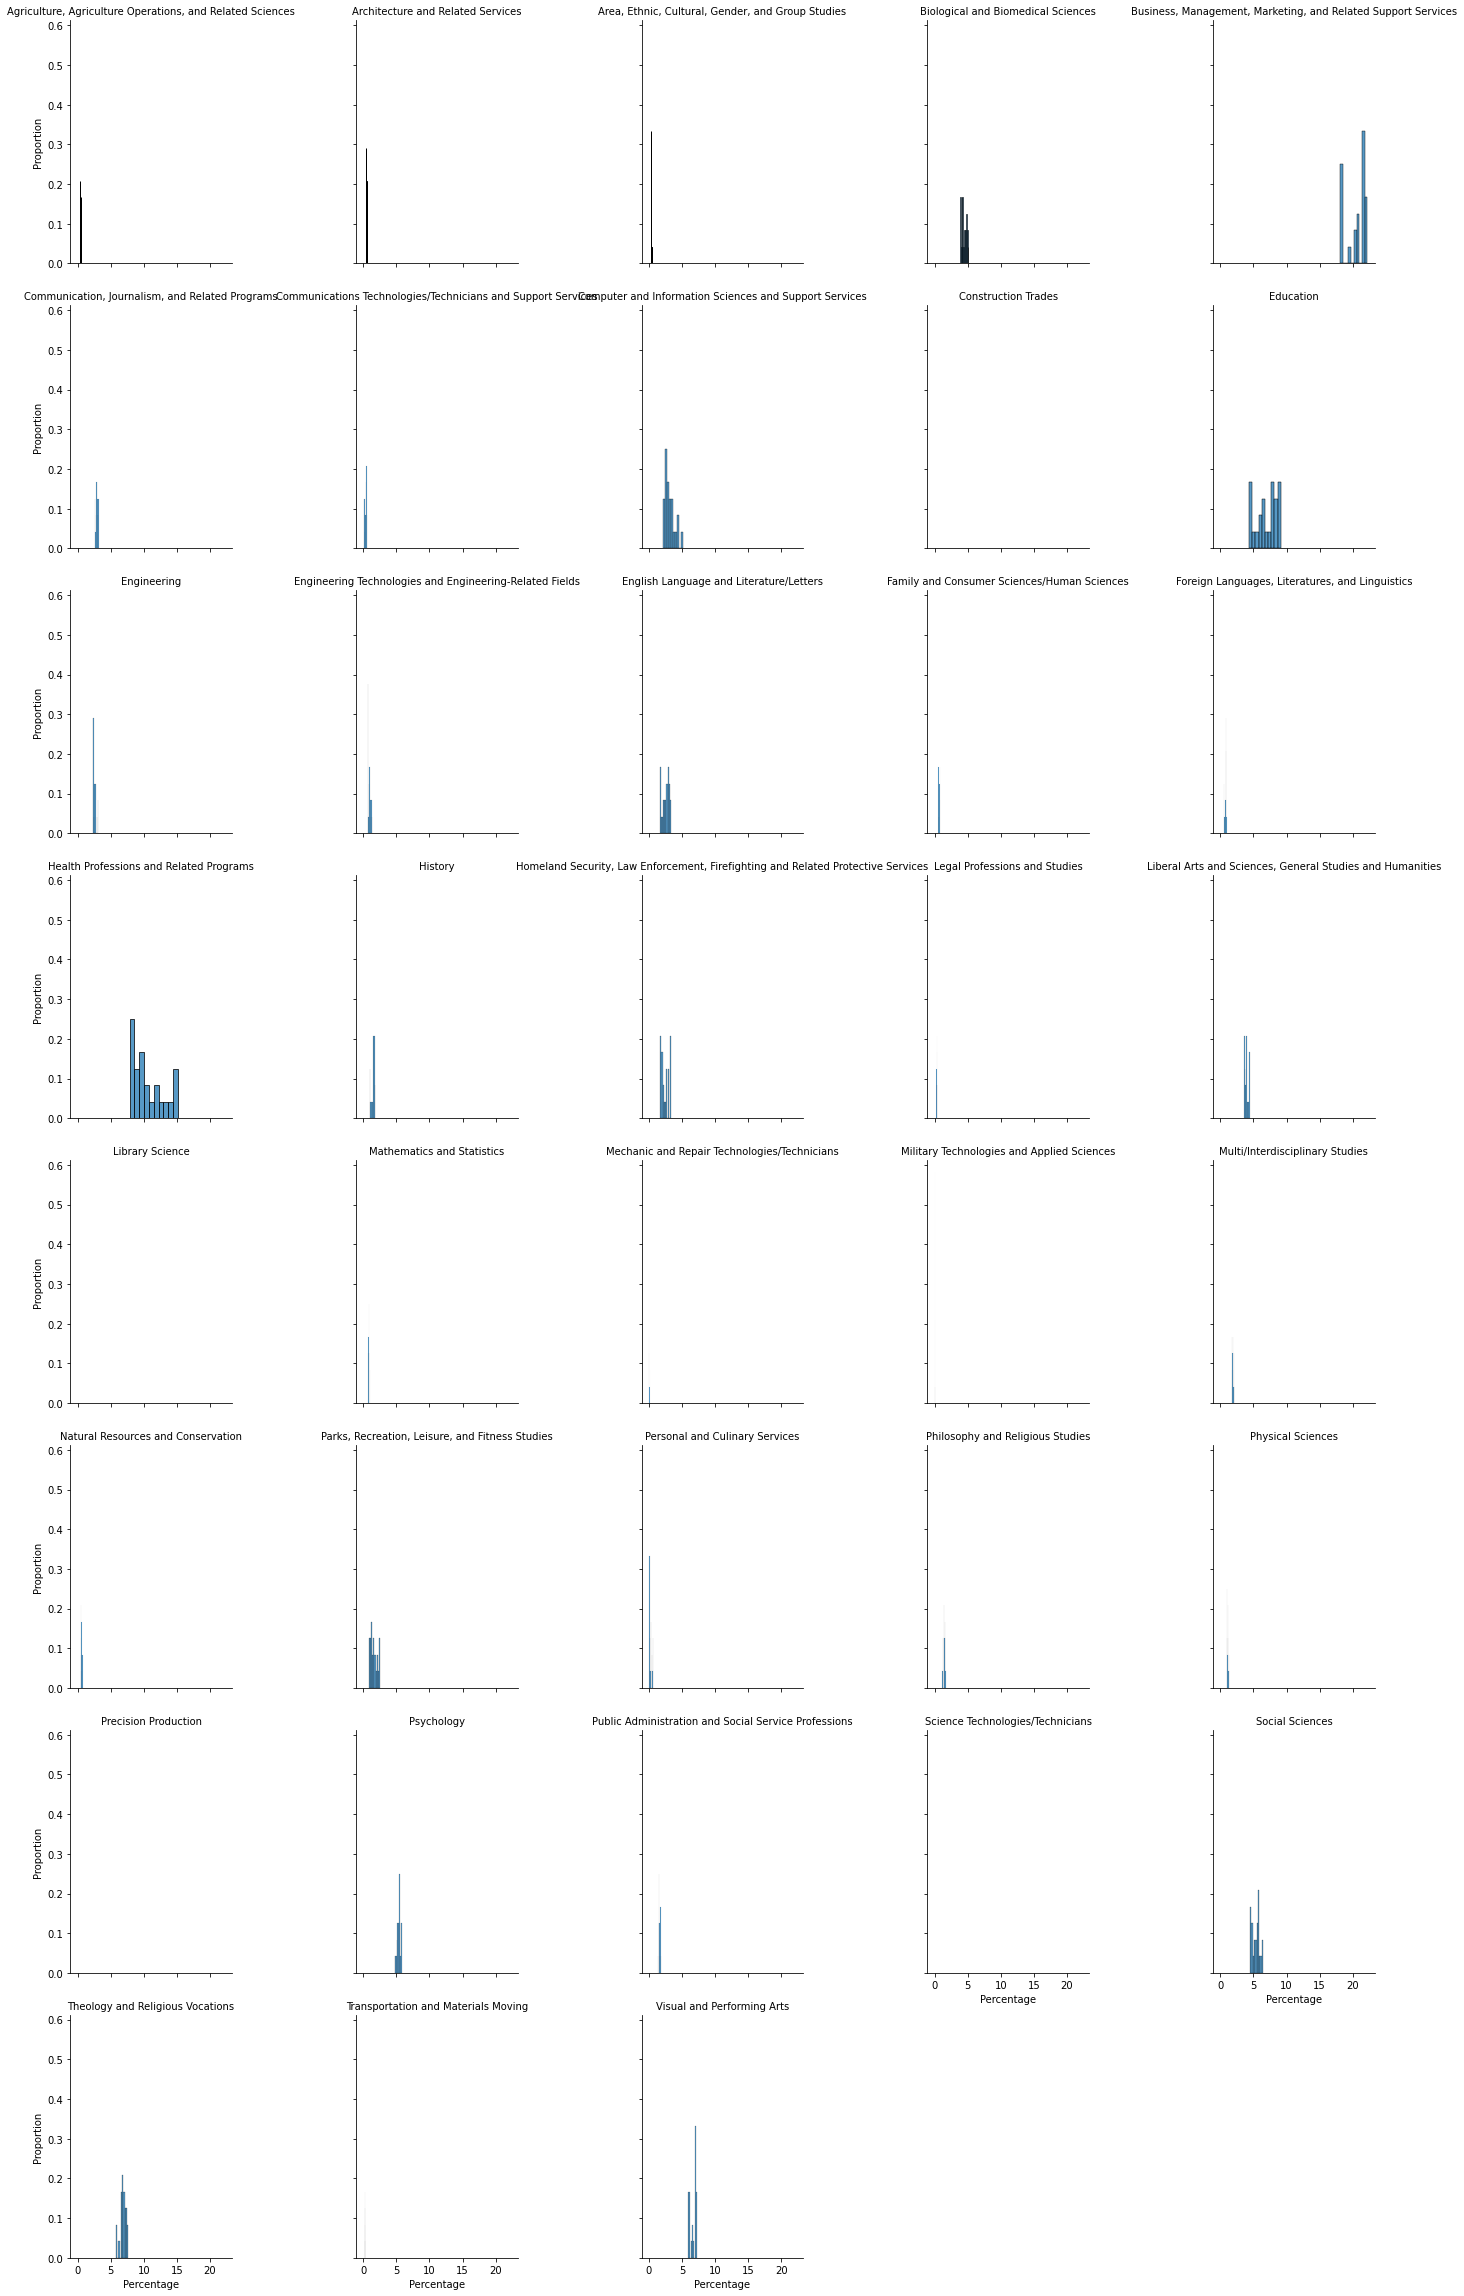

In [40]:
# Look at the proportion of percent degrees awarded by degree, grouped by end of school year
g = sns.FacetGrid(data = by_endyear_degree, col = 'Degree', col_wrap = 5, height = 4, aspect = 1)
g.map_dataframe(sns.histplot, x = 'Percentage', stat = 'proportion', bins = 10)
g.set_titles(col_template = '{col_name}')

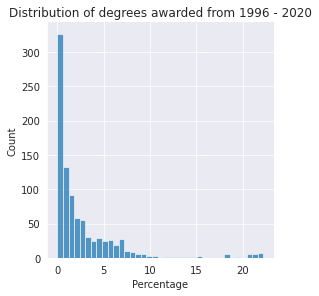

In [41]:
# Distribution of degrees awarded from 1996 - 2020. Few degrees are awarded more than 10 percent in a given year
with sns.axes_style("darkgrid"):
  sns.displot(data = by_endyear_degree, x = 'Percentage', height = 4, aspect = 1)
  plt.title('Distribution of degrees awarded from 1996 - 2020')
  plt.savefig('Degree_awarded_all.png', dpi = 600, orientation = 'landscape', bbox_inches = 'tight')

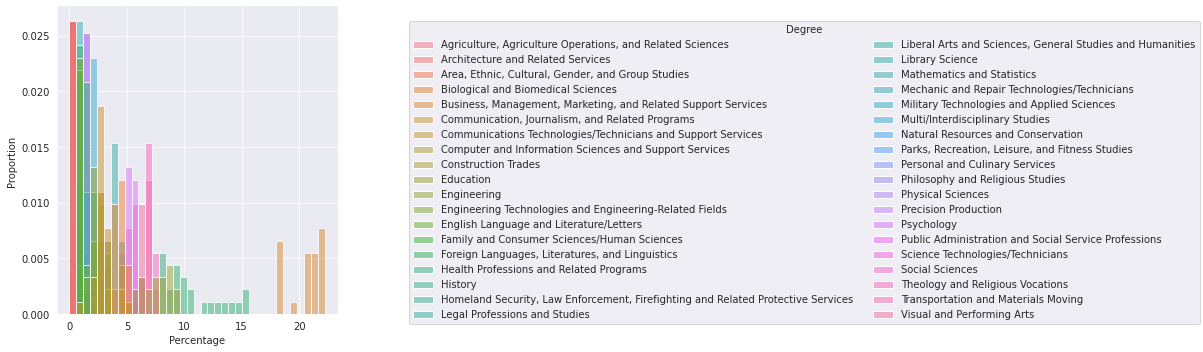

In [42]:
with sns.axes_style("darkgrid"):
  g = sns.displot(data = by_endyear_degree, x = 'Percentage', hue = 'Degree', stat = 'proportion')
  sns.move_legend(g, loc = 'center left', bbox_to_anchor = (0.5,0.5), ncol = 2)
  plt.savefig('total_proportion_degrees.png', dpi = 600, orientation = 'landscape', bbox_inches = 'tight')

To provide a deeper view into the disbribution, I have filtered the datset to have percentage of degrees greater than 1%. 

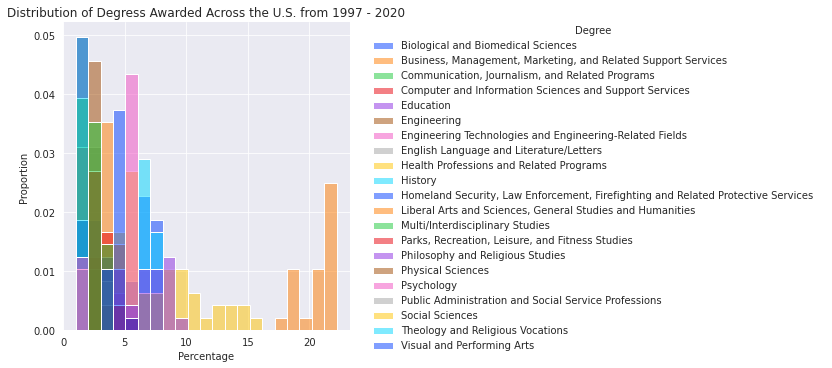

In [43]:
with sns.axes_style("darkgrid"):
  g = sns.displot(data = by_endyear_degree[by_endyear_degree['Percentage'] > 1], x = 'Percentage', hue = 'Degree', palette = 'bright', stat = 'proportion')
  sns.move_legend(g, loc = 'center left', bbox_to_anchor = (0.45,0.5), ncol = 1, frameon = False)
  plt.title('Distribution of Degress Awarded Across the U.S. from 1997 - 2020')
  sns.set_style("ticks")
plt.savefig('onepercent_proportiondistribution_of_degrees.png', dpi = 600, orientation = 'landscape', bbox_inches = 'tight')

By state

In [44]:
# Create grouped data frame with end year, state, and degree to look at difference across years and state
by_state_degree = stacked_df.groupby(['ENDYEAR', 'STATE', 'Degree'])['Percentage'].mean().reset_index().sort_values(['ENDYEAR', 'STATE', 'Degree','Percentage'], ascending = False)

In [45]:
stacked_df.head()

ENDYEAR                                             REGION    STATE  \
0     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
1     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
2     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
3     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   
4     2001  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...  Alabama   

     CITY                    INSTNM  \
0  Normal  Alabama A & M University   
1  Normal  Alabama A & M University   
2  Normal  Alabama A & M University   
3  Normal  Alabama A & M University   
4  Normal  Alabama A & M University   

                                              Degree  Percentage  
0  Agriculture, Agriculture Operations, and Relat...        6.24  
1                  Architecture and Related Services        1.10  
2  Area, Ethnic, Cultural, Gender, and Group Studies        0.00  
3                 Biological and Biomedical Sciences        6.61  
4  Business, Management, Marketing, and Related S...       17.98

In [46]:
# Average percent degree awarded by degree across U.S.
degree_distribution = stacked_df.groupby('Degree')['Percentage'].mean().sort_values(ascending = False).reset_index()

In [47]:
degree_distribution

Degree  Percentage
0   Business, Management, Marketing, and Related S...       20.56
1             Health Professions and Related Programs       10.68
2                    Theology and Religious Vocations        6.89
3                                           Education        6.88
4                          Visual and Performing Arts        6.69
5                                          Psychology        5.36
6                                     Social Sciences        5.35
7                  Biological and Biomedical Sciences        4.38
8   Liberal Arts and Sciences, General Studies and...        3.94
9   Computer and Information Sciences and Support ...        3.17
10    Communication, Journalism, and Related Programs        2.94
11                                        Engineering        2.52
12  Homeland Security, Law Enforcement, Firefighti...        2.50
13            English Language and Literature/Letters        2.50
14                    Multi/Interdisciplinary Studies        1.91
15    Parks, Recreation, Leisure, and Fitness Studies        1.60
16  Public Administration and Social Service Profe...        1.59
17                                            History        1.51
18                   Philosophy and Religious Studies        1.46
19                                  Physical Sciences        1.14
20  Engineering Technologies and Engineering-Relat...        0.90
21                         Mathematics and Statistics        0.83
22    Foreign Languages, Literatures, and Linguistics        0.79
23        Family and Consumer Sciences/Human Sciences        0.70
24                 Natural Resources and Conservation        0.59
25  Agriculture, Agriculture Operations, and Relat...        0.46
26                  Architecture and Related Services        0.45
27  Communications Technologies/Technicians and Su...        0.35
28                      Legal Professions and Studies        0.34
29  Area, Ethnic, Cultural, Gender, and Group Studies        0.33
30                Transportation and Materials Moving        0.27
31                     Personal and Culinary Services        0.27
32       Mechanic and Repair Technologies/Technicians        0.06
33                   Science Technologies/Technicians        0.02
34                               Precision Production        0.02
35                                Construction Trades        0.01
36         Military Technologies and Applied Sciences        0.01
37                                    Library Science        0.00

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


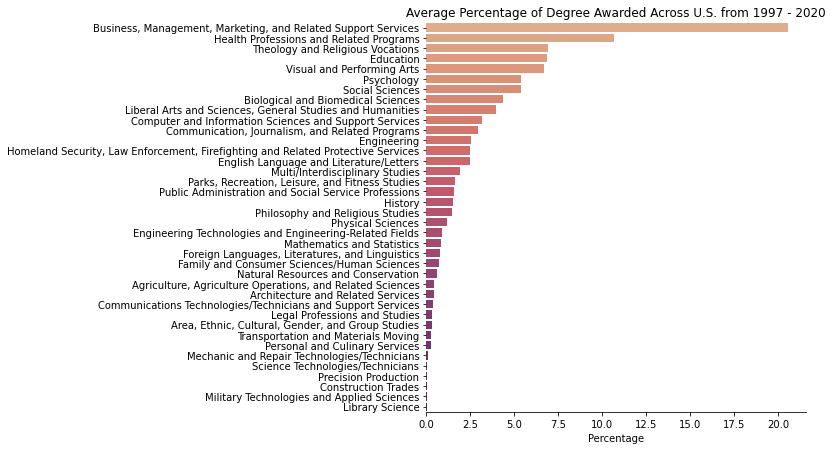

In [48]:
# Barplot of the mean percent of degreee awarded across the U.S.
g = sns.catplot(
    data=degree_distribution, kind="bar",
    x="Percentage", y="Degree", # hue="sex", ci="sd", 
    palette="flare", height = 6
)
g.despine(left=True)
g.set_axis_labels("Percentage", "")
g.set(title = 'Average Percentage of Degree Awarded Across U.S. from 1997 - 2020')
save_image("avg_perct_degree", 300)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


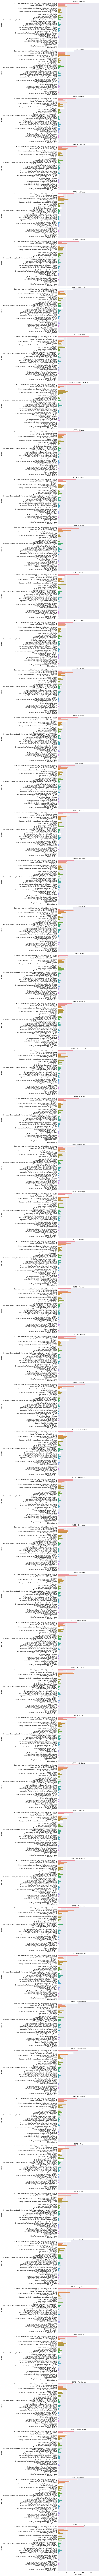

In [49]:
# Group by state and degree
state_degree = stacked_df.groupby(['STATE', 'Degree'])['Percentage'].mean().sort_values(ascending = False).reset_index()

states_ordered = stacked_df['STATE'].sort_values().unique()
# Distribution of degrees by state
with sns.axes_style('darkgrid'):
  g = sns.catplot(data = state_degree, kind = 'bar', row = 'STATE', row_order=states_ordered,
                  x="Percentage", y="Degree")


Observation: Few degrees are awarded more than 10 percent in a given year

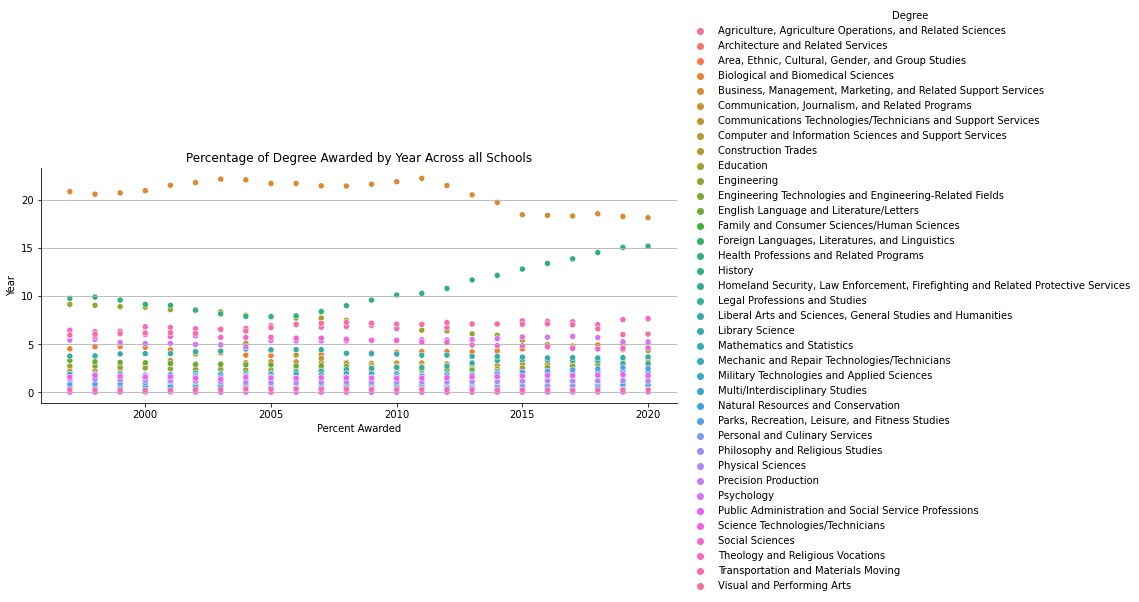

In [50]:
# Create a scatter plot of the average percent degree awared from 1997 - 2020
g = sns.relplot(data = by_endyear_degree, x = 'ENDYEAR', y = 'Percentage', height = 4, aspect = 2.5, hue = 'Degree')
g.set(xlabel='Percent Awarded',
       ylabel='Year',
       title='Percentage of Degree Awarded by Year Across all Schools')
sns.set_style("white")
plt.grid(True, axis = 'y', which = 'major')

# Save figure
save_image('degrees_over_time.png', 600)


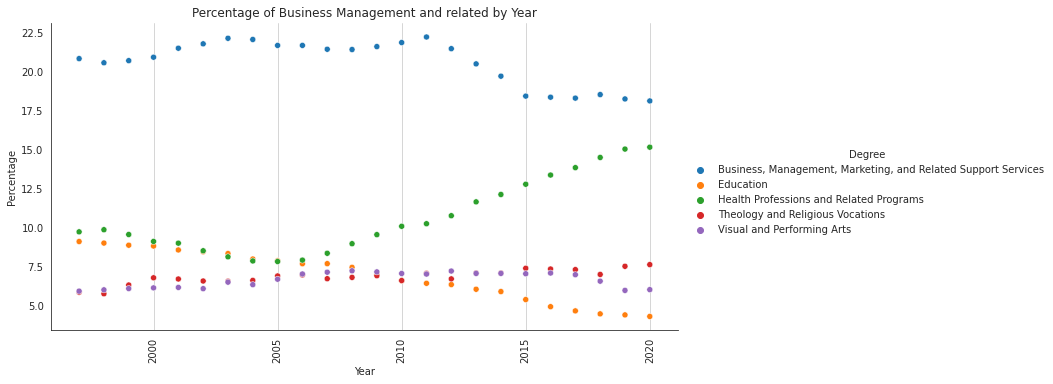

In [54]:
# Top five degrees that are chaning in the graph above
data = by_endyear_degree[by_endyear_degree['Degree'].isin(['Business, Management, Marketing, and Related Support Services', 'Health Professions and Related Programs', 'Education', 'Theology and Religious Vocations', 'Visual and Performing Arts'])]
g = sns.relplot(data = data, x = 'ENDYEAR', y = 'Percentage', hue = 'Degree', aspect = 2)
plt.title('Percentage of Business Management and related by Year')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.xticks(rotation = 'vertical')
plt.grid(True, which = 'major', axis = 'x')
plt.savefig('degrees_topfive_overtime.png', dpi = 600, orientation = 'landscape', bbox_inches = 'tight')

### Linear regression of degrees

In [55]:
# Linear regression analysis on degrees over years across states
from sklearn.linear_model import LinearRegression

In [56]:
# Perform linear regression to get an idea of which degrees are increasing and decreasing over the years. 
lin_reg_df = pd.DataFrame(columns = ['Degree', 'Coef', 'R_sq', 'Intercept'])
for col in by_endyear_degree['Degree'].unique(): 
  df_temp = by_endyear_degree[by_endyear_degree['Degree'] == col]
  x = df_temp['ENDYEAR'].to_numpy().reshape(-1,1)
  y = df_temp['Percentage']
  model = LinearRegression().fit(x, y)
  df_add = pd.DataFrame.from_dict(
      {'Degree': [col], 'Coef': [model.coef_[0]], 'R_sq': [model.score(x,y)], 'Intercept': [model.intercept_]} 
  )
  lin_reg_df = pd.concat([lin_reg_df, df_add])

In [57]:
lin_reg_df.sort_values(by = ['R_sq', 'Coef'], ascending = False)

Degree  Coef  R_sq  Intercept
0                                          Education -0.23  0.98     461.34
0            English Language and Literature/Letters -0.07  0.98     144.33
0                                    Social Sciences -0.08  0.97     167.49
0    Parks, Recreation, Leisure, and Fitness Studies  0.08  0.97    -149.18
0  Engineering Technologies and Engineering-Relat... -0.03  0.90      60.52
0  Homeland Security, Law Enforcement, Firefighti...  0.08  0.88    -155.67
0    Foreign Languages, Literatures, and Linguistics -0.01  0.81      29.30
0                   Theology and Religious Vocations  0.06  0.75    -105.37
0                     Personal and Culinary Services  0.03  0.73     -51.08
0                  Architecture and Related Services -0.01  0.71      11.29
0                                            History -0.03  0.71      63.32
0            Health Professions and Related Programs  0.28  0.69    -551.74
0  Area, Ethnic, Cultural, Gender, and Group Studies -0.00  0.64       9.78
0                   Philosophy and Religious Studies -0.02  0.63      32.23
0        Family and Consumer Sciences/Human Sciences  0.01  0.63     -16.61
0                    Multi/Interdisciplinary Studies  0.01  0.60     -21.73
0  Communications Technologies/Technicians and Su...  0.02  0.58     -34.49
0         Military Technologies and Applied Sciences  0.00  0.58      -3.59
0                               Precision Production  0.00  0.55      -1.57
0                      Legal Professions and Studies -0.00  0.53       9.36
0  Business, Management, Marketing, and Related S... -0.14  0.48     304.77
0       Mechanic and Repair Technologies/Technicians -0.00  0.40       2.73
0  Liberal Arts and Sciences, General Studies and... -0.02  0.33      52.53
0                 Natural Resources and Conservation  0.01  0.31     -14.27
0                                         Psychology  0.02  0.30     -36.76
0  Public Administration and Social Service Profe...  0.01  0.21     -14.92
0                         Visual and Performing Arts  0.03  0.18     -51.77
0                                    Library Science -0.00  0.17       0.18
0                                        Engineering  0.01  0.15     -24.40
0                 Biological and Biomedical Sciences  0.02  0.12     -32.08
0                                  Physical Sciences -0.00  0.09      10.10
0    Communication, Journalism, and Related Programs  0.01  0.08      -9.09
0  Agriculture, Agriculture Operations, and Relat... -0.00  0.04       3.15
0                Transportation and Materials Moving -0.00  0.03       2.03
0                                Construction Trades  0.00  0.01      -0.16
0                         Mathematics and Statistics -0.00  0.01       2.48
0                   Science Technologies/Technicians  0.00  0.00      -0.09
0  Computer and Information Sciences and Support ... -0.00  0.00       7.69

### Distributions and Admission Rates

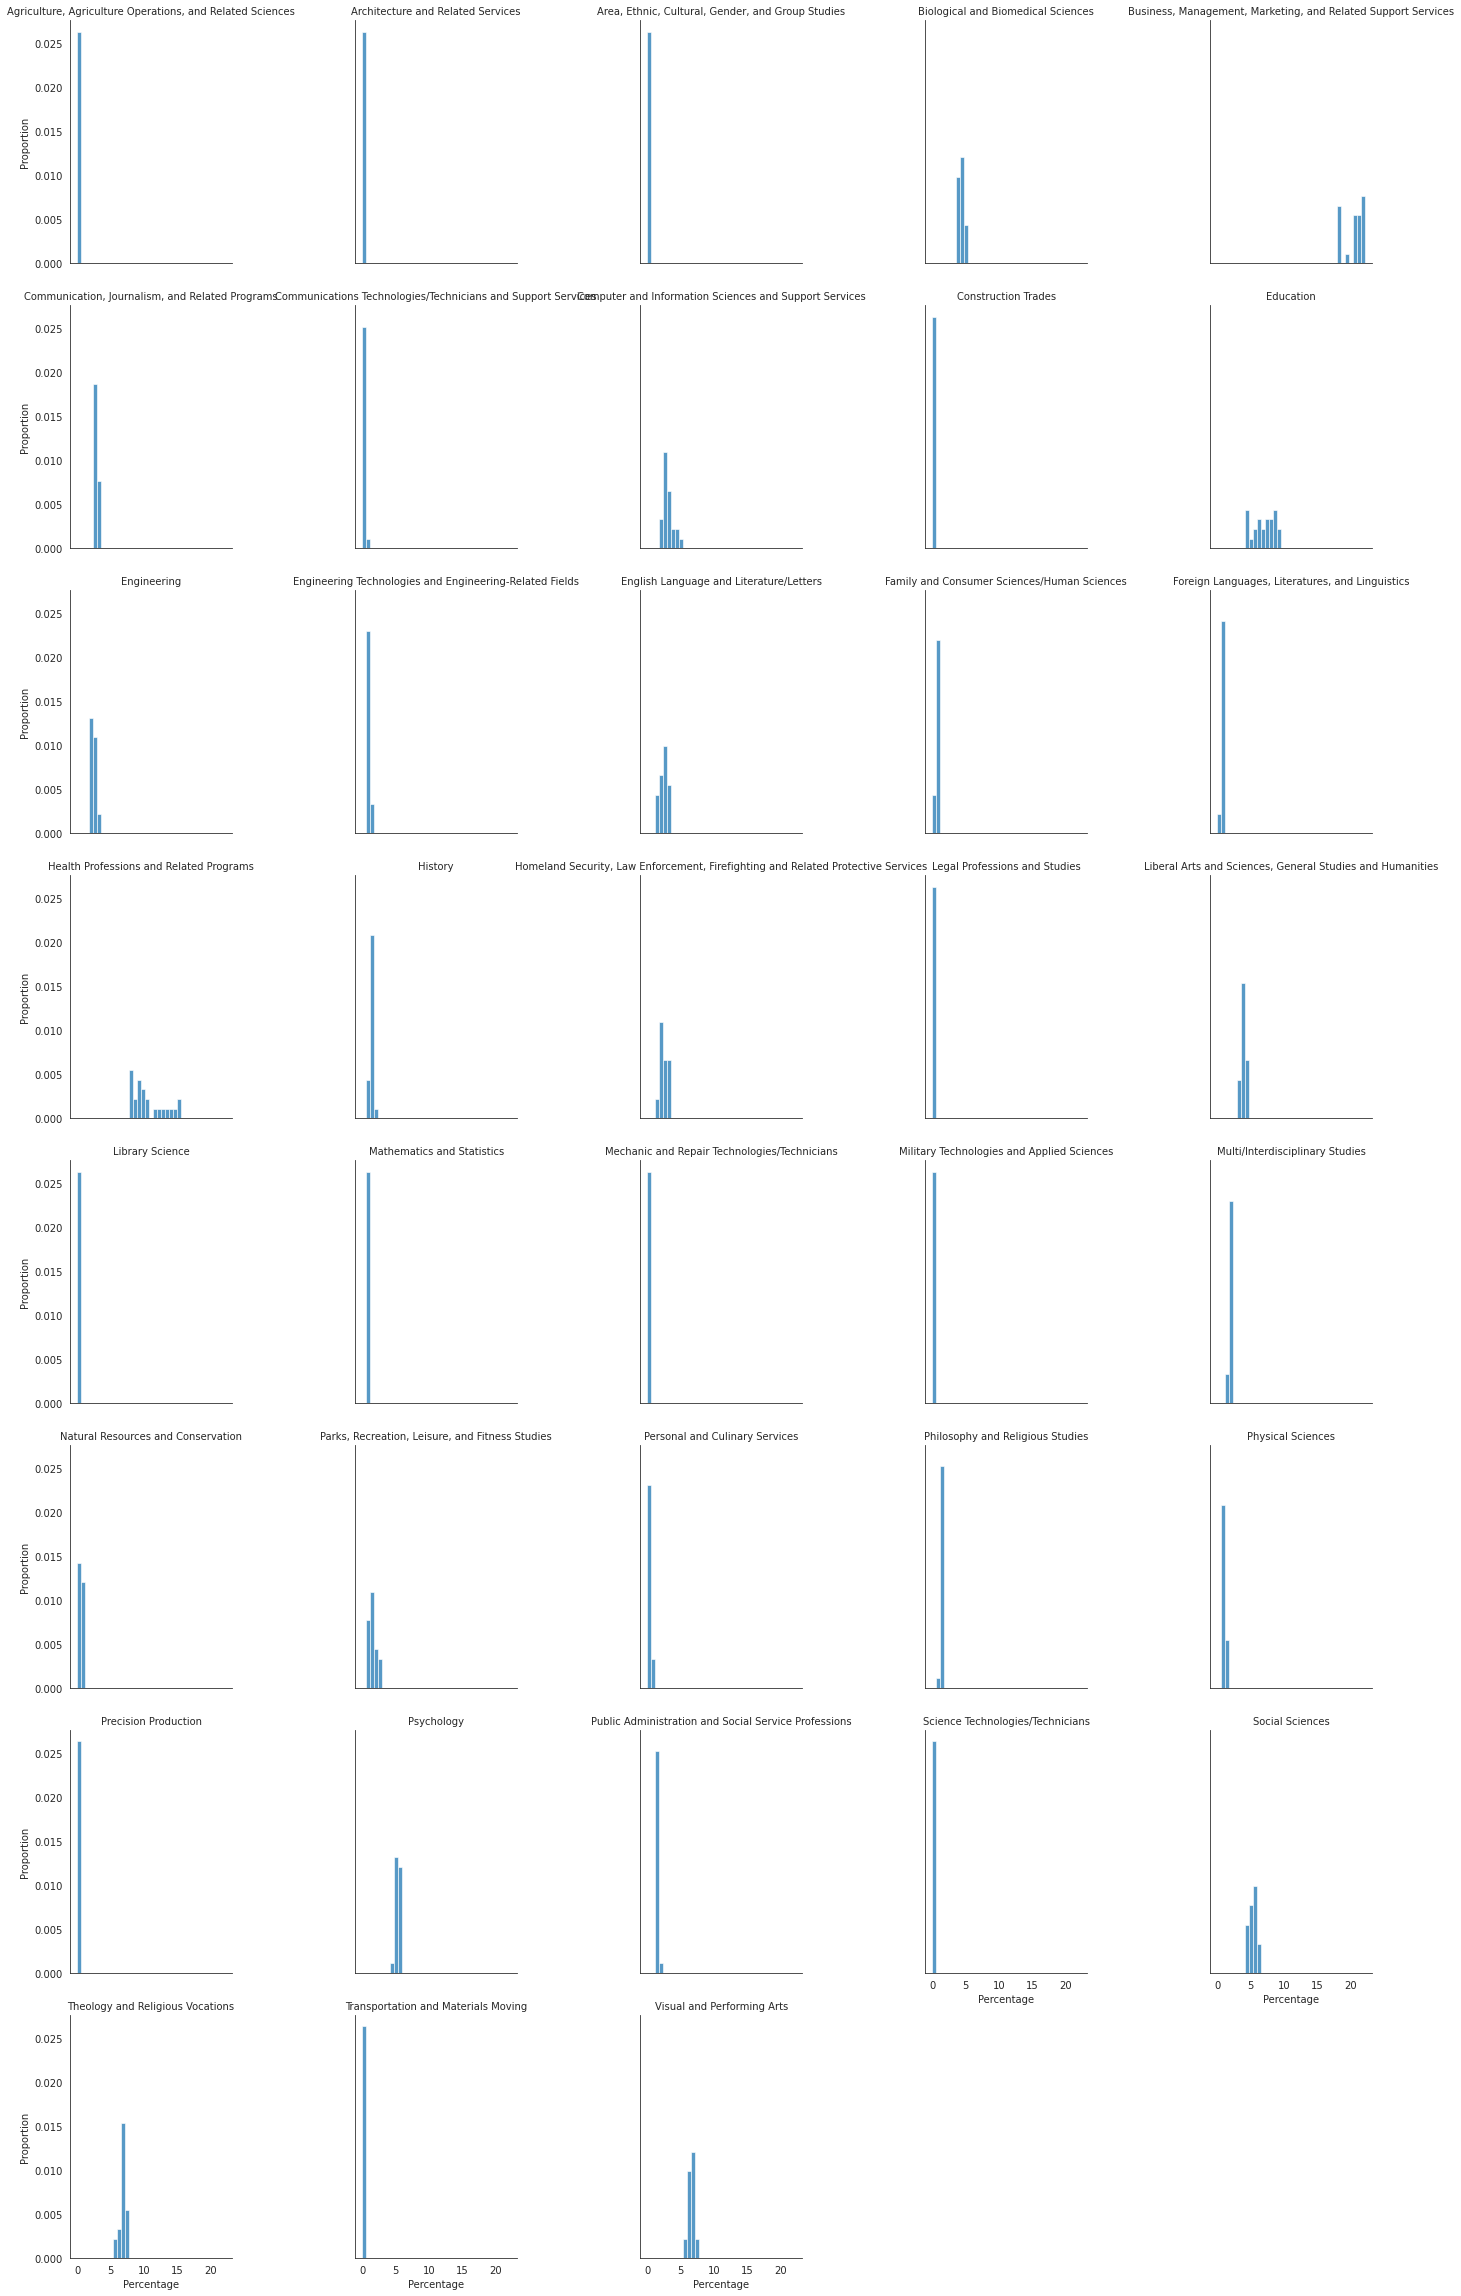

In [58]:
# Distribution of percentage separated by degree
g = sns.displot(data = by_endyear_degree, x = 'Percentage', height = 4, aspect = 1, stat = 'proportion', 
                col = 'Degree', col_wrap = 5)
g.set_titles(col_template='{col_name}')

In [59]:
percent_df.rename(columns = {"Liberal Arts and Sciences, General Studies and Humanities": "Liberal Arts and Sciences, \n General Studies and Humanities"})
percent_df

ADM_RATE  ADM_RATE_ALL Carnegie Classification Basic  \
0           NaN           NaN                           NaN   
1           NaN           NaN                           NaN   
2           NaN           NaN                           NaN   
3           NaN           NaN                           NaN   
4           NaN           NaN                           NaN   
...         ...           ...                           ...   
48471       NaN           NaN                           NaN   
48472       NaN           NaN                           NaN   
48473       NaN           NaN                           NaN   
48474       NaN           NaN                           NaN   
48475       NaN           NaN                           NaN   

      Carnegie Classification size and setting  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
48471                                      NaN   
48472                                      NaN   
48473                                      NaN   
48474                                      NaN   
48475                                      NaN   

      Carnegie Classification undergraduate profile           CIP01BACHL  \
0                                               NaN      Program offered   
1                                               NaN  Program not offered   
2                                               NaN  Program not offered   
3                                               NaN  Program not offered   
4                                               NaN  Program not offered   
...                                             ...                  ...   
48471                                           NaN  Program not offered   
48472                                           NaN  Program not offered   
48473                                           NaN  Program not offered   
48474                                           NaN  Program not offered   
48475                                           NaN  Program not offered   

                CIP03BACHL           CIP04BACHL           CIP05BACHL  \
0          Program offered      Program offered  Program not offered   
1      Program not offered  Program not offered  Program not offered   
2      Program not offered  Program not offered  Program not offered   
3      Program not offered  Program not offered      Program offered   
4      Program not offered  Program not offered  Program not offered   
...                    ...                  ...                  ...   
48471  Program not offered  Program not offered  Program not offered   
48472  Program not offered  Program not offered  Program not offered   
48473  Program not offered  Program not offered  Program not offered   
48474  Program not offered  Program not offered  Program not offered   
48475  Program not offered  Program not offered  Program not offered   

                CIP09BACHL           CIP10BACHL           CIP11BACHL  \
0      Program not offered      Program offered      Program offered   
1          Program offered  Program not offered      Program offered   
2      Program not offered  Program not offered  Program not offered   
3      Program not offered  Program not offered      Program offered   
4          Program offered  Program not offered      Program offered   
...                    ...                  ...                  ...   
48471  Program not offered  Program not offered      Program offered   
48472      Program offered  Program not offered  Program not offered   
48473      Program offered  Program not offered  Program not offered   
48474  Program not offered  Program not offered      Program offered   
48475  Program not offered  Program not offered      Program offered   

      

In [60]:
by_endyear_region = percent_df.groupby(['ENDYEAR', 'REGION'])[var_degrees].mean().stack().reset_index().rename(columns = {'level_2':'Degree', 0:'Percentage'})

In [61]:
by_endyear_region.head()

ENDYEAR                             REGION  \
0     1997  Far West (AK, CA, HI, NV, OR, WA)   
1     1997  Far West (AK, CA, HI, NV, OR, WA)   
2     1997  Far West (AK, CA, HI, NV, OR, WA)   
3     1997  Far West (AK, CA, HI, NV, OR, WA)   
4     1997  Far West (AK, CA, HI, NV, OR, WA)   

                                              Degree  Percentage  
0  Agriculture, Agriculture Operations, and Relat...        0.00  
1                  Architecture and Related Services        0.01  
2  Area, Ethnic, Cultural, Gender, and Group Studies        0.01  
3                 Biological and Biomedical Sciences        0.04  
4  Business, Management, Marketing, and Related S...        0.24

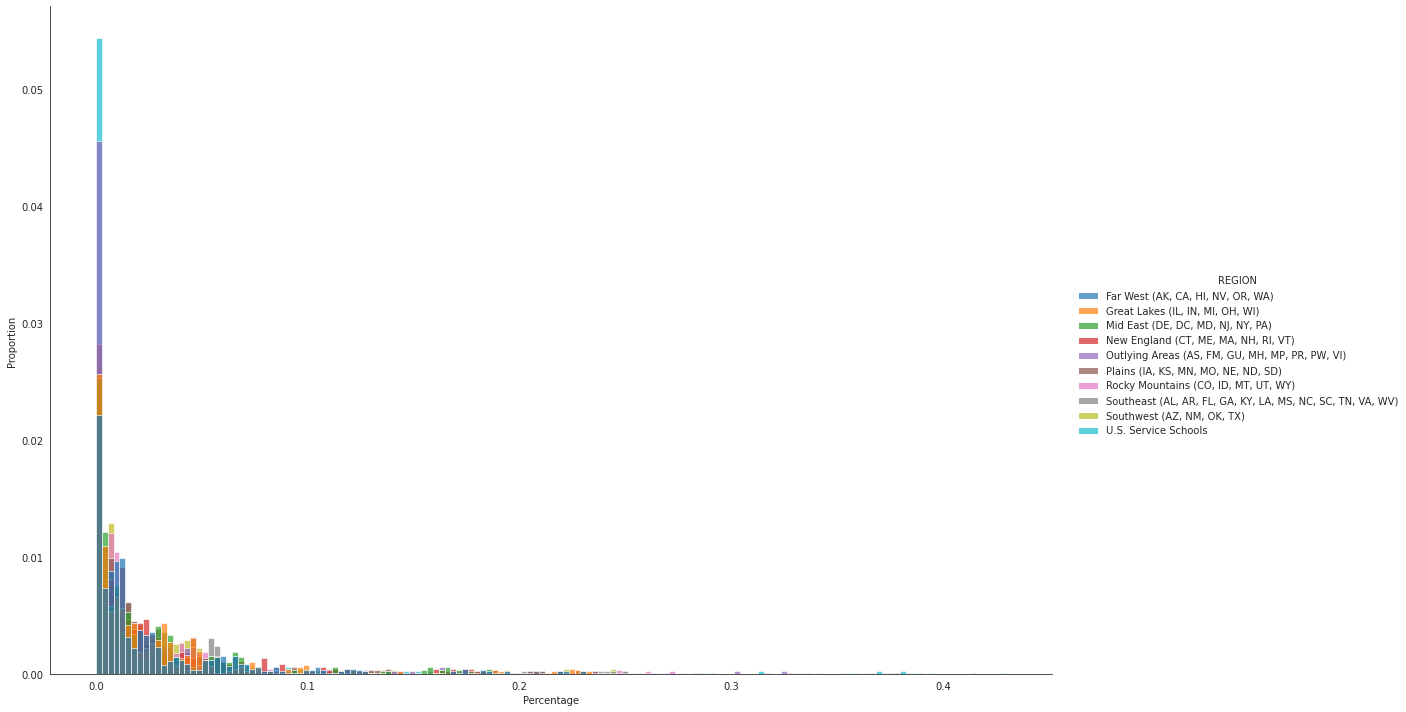

In [62]:
# Proportion of degress offered by region
g = sns.displot(data = by_endyear_region, x = 'Percentage', hue = 'REGION',
                # type of metric to plot
                stat = 'proportion',
                # Char of graph of graph
                height = 10, aspect = 1.5, alpha = 0.7)

In [63]:
by_endyear_state = percent_df.groupby(['ENDYEAR', 'STATE'])[var_degrees].mean().stack().reset_index().rename(columns = {'level_2':'Degree', 0:'Percentage'})

In [64]:
by_endyear_state.head()

ENDYEAR    STATE                                             Degree  \
0     1997  Alabama  Agriculture, Agriculture Operations, and Relat...   
1     1997  Alabama                  Architecture and Related Services   
2     1997  Alabama  Area, Ethnic, Cultural, Gender, and Group Studies   
3     1997  Alabama                 Biological and Biomedical Sciences   
4     1997  Alabama  Business, Management, Marketing, and Related S...   

   Percentage  
0        0.00  
1        0.00  
2        0.00  
3        0.05  
4        0.29

In [ ]:
# Proportion of degress offered by state
g = sns.displot(data = by_endyear_state, x = 'Percentage', hue = 'STATE',
                # type of metric to plot
                stat = 'proportion',
                # Char of graph of graph
                height = 10, aspect = 1.5, alpha = 0.7)
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor = (0.5, 1) , ncol = 5, title = "STATE", frameon = False))

In [ ]:
# Proportion of degress offered by state
g = sns.displot(data = by_endyear_state, x = 'Percentage', col = 'STATE', col_wrap = 5,
                # type of metric to plot
                stat = 'proportion',
                # Char of graph of graph
                height = 5, aspect = 1.5, alpha = 0.7
                )
# plt.xscale('log')
g.set_titles(col_template = '{col_name}')

In [ ]:
# Admission rates by year by Tatianna
sns.relplot(data = df, x = df['ENDYEAR'] , y = df['ADM_RATE_ALL'], kind = 'line')
plt.title("Admissions Rates in the U.S. By Year", fontsize = 12)
plt.xticks(rotation = 90)